In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as si
from common import constraints

In [51]:
def rhs(t, y, M): # [M] = 2
    H = 1 / (2*t)
    theta1, theta1_dot, theta2, theta2_dot = y
    return (
        theta1_dot,
        - 3 * H * theta1_dot - M * np.sin(theta1) * (1 - np.cos(theta2)),
        theta2_dot,
        - 3 * H * theta2_dot - M * np.sin(theta2) * (1 - np.cos(theta1)),
    )

In [73]:
def solve(M, start, end, theta1_initial, theta2_initial, solver="RK45"):
    steps = np.geomspace(start, end, 1000)
    steps[0] = start
    steps[-1] = end
    return si.solve_ivp(rhs, (start, end), (theta1_initial, 0.0, theta2_initial, 0.0), 
                        args=(M,), t_eval=steps, method=solver)

In [91]:
M = 1e9**2
H_inf = 1e10
start = 1 / H_inf
sol = solve(M, start, 1e6 * start, np.pi - 0.001, np.pi - 0.01, solver="DOP853")

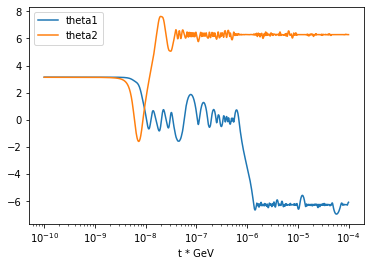

In [94]:
plt.semilogx(sol.t, sol.y[0], ls="-", color="tab:blue", label="theta1")
plt.semilogx(sol.t, sol.y[2], ls="-", color="tab:orange", label="theta2")
plt.legend()
plt.xlabel("t * GeV");

Text(0, 0.5, 'theta2')

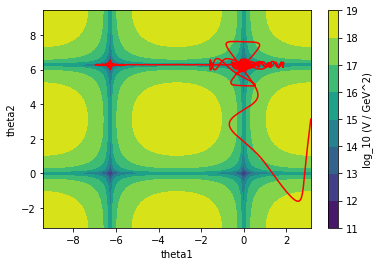

In [99]:
theta1 = np.linspace(np.pi * (np.trunc(np.min(sol.y[0]) / np.pi) - 1), 
                    np.pi * (np.trunc(np.max(sol.y[0]) / np.pi) + 1), 100)
theta2 = np.linspace(np.pi * (np.trunc(np.min(sol.y[2]) / np.pi) - 1), 
                    np.pi * (np.trunc(np.max(sol.y[2]) / np.pi) + 1), 100)
tt1, tt2 = np.meshgrid(theta1, theta2)
V = M * (1 - np.cos(tt1)) * (1 - np.cos(tt2))
# M(T) cos(alpha theta1 + beta theta2) + M'(T) cos(alpha' theta1 + beta' theta2)
# one of them vanishes later
plt.contourf(theta1, theta2, np.log10(V))
plt.colorbar().set_label("log_10 (V / GeV^2)")
plt.plot(sol.y[0], sol.y[2], color="red")

plt.xlabel("theta1")
plt.ylabel("theta2")